In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, accuracy_score,precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve

In [3]:
df = pd.read_csv(r"C:\Users\sahil\OneDrive\Python Self\EDA\Telecom_Customer_Churn\Preprocessed_Telecom_data.csv")

In [4]:
df.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,...,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,...,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,...,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,...,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,...,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


In [5]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

In [6]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


In [7]:
# outlier removal
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(x_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)


# the function is empty means 
# it will take the default argumrnts 
# with out hyperparameter tuning

DecisionTreeClassifier()

In [10]:
DT.get_params() # to get all hyperparameter of models

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
# prediction
y_prediction = DT.predict(x_test)

In [12]:
# model evalutation
print(y_test.values[:20])
print(y_prediction[:20])

[0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0]
[1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0]


In [13]:
DT_accurecy = accuracy_score(y_test,y_prediction)
DT_accurecy

0.7352637021716649

In [14]:
confusion_matrix(y_test,y_prediction)

array([[205, 123],
       [133, 506]], dtype=int64)

In [15]:
confusion_matrix(y_test,y_prediction).ravel()
# TN, FP, FN, TP

array([205, 123, 133, 506], dtype=int64)

In [16]:
TN, FP, FN, TP = confusion_matrix(y_test,y_prediction).ravel()

In [17]:
# Precision TP/(TP+FP)
precision = TP/(TP+FP)
precision

0.8044515103338633

In [18]:
# recall TP/(TP+FN)
recall = TP / (TP+FN)
recall

0.7918622848200313

In [19]:
# F1 Score (2*precision * recall)/ (precision+recall)
F1Score = (2*precision*recall) / (precision+recall)
F1Score

0.7981072555205047

In [20]:
acc= accuracy_score(y_test,y_prediction)
pre = precision_score(y_test,y_prediction)
recl = recall_score(y_test,y_prediction)
f1scor = f1_score(y_test,y_prediction)
print(acc)
print(pre)
print(recl)
print(f1scor)

0.7352637021716649
0.8044515103338633
0.7918622848200313
0.7981072555205047


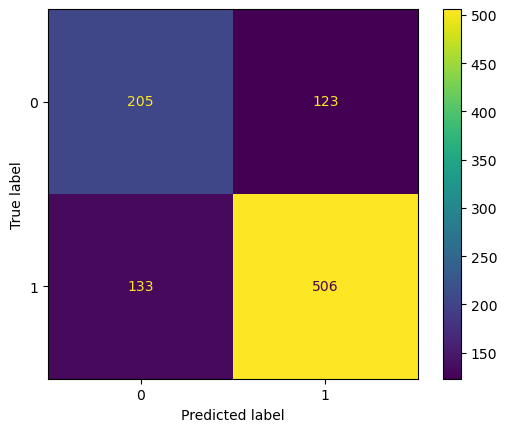

In [21]:
cmt = confusion_matrix(y_test,y_prediction)
ConfusionMatrixDisplay(cmt).plot()
plt.grid(False)

In [22]:
DT.predict_proba(x_test)
# NO   YES
# [0    1] == max : 1  === yes : 1
# [1    0] == max : 1 ==== no :  0
# [0    1] == max : 1  === yes : 1

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [23]:
y_predict_probability = DT.predict_proba(x_test)

roc auc curve  calculated on probability of prediction 

roc-auc curve : FPR vs TPR
y_predict_probability 

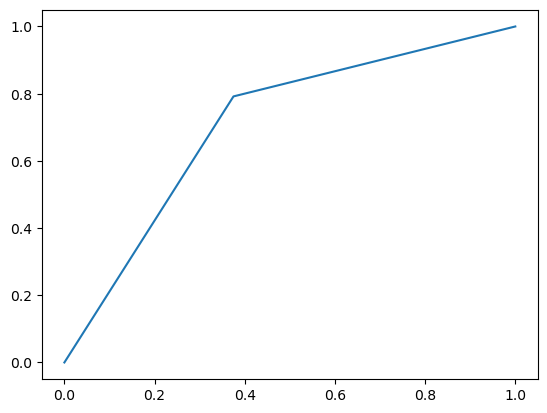

In [24]:
fpr, tpr, thershold = roc_curve(y_test,y_predict_probability[:,1])
plt.plot(fpr,tpr)

In [25]:
# step 1
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

# step 2



DecisionTreeClassifier()

accuray is: 76.73
F1 is: 0.83
Precision is: 0.84
Recall is: 0.81


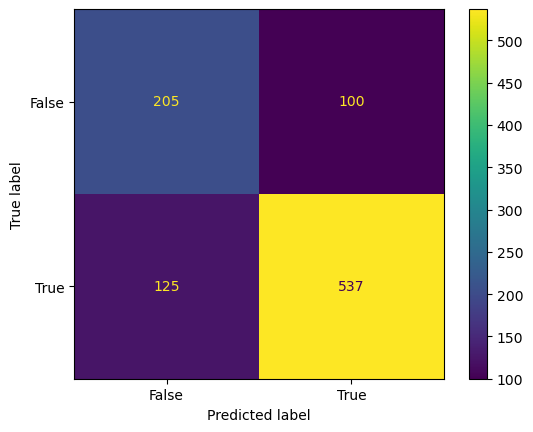

True negative: 205
False postive: 100
False negative: 125
True postive: 537


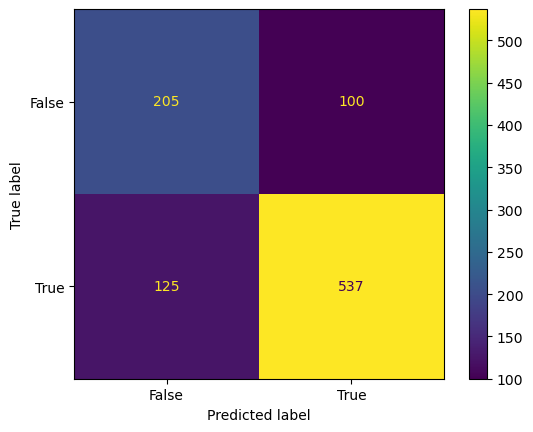

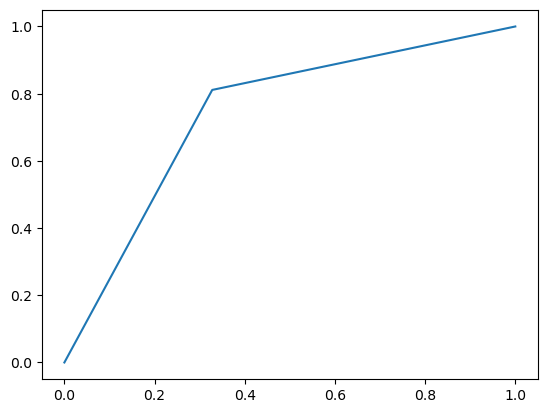

In [26]:
### step-1 divide the data into input and target columns
x=df.drop('Customer Status', axis = 1)
y=df['Customer Status']

### step-2 divide the data into 4 parts
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### step-3 outlier analysis

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(x_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

### step 4 - train the model

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

### step 5 - Predictions

y_pred_dt = dtree.predict(x_test)

### step 6-  Metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

### step 7 - confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix = cmt, display_labels = [False, True])

disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

disp.plot()
plt.show()
#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(x_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### Decision Tree 
**Without hyperparameter Tuning**

accuracy_score 74.04
f1_score 0.8
precision_score 0.82
recall_score 0.78


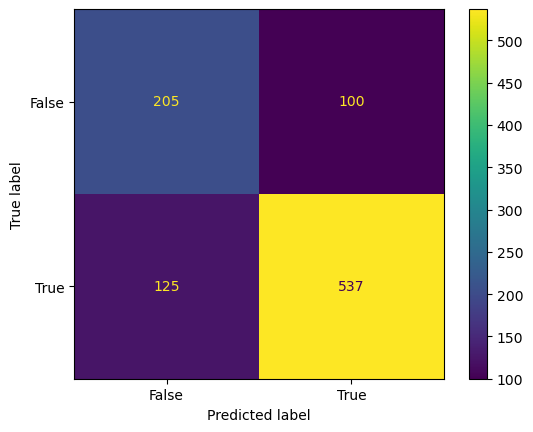

True Negative 217
False Positive 113
False Negative 138
True Positive 499


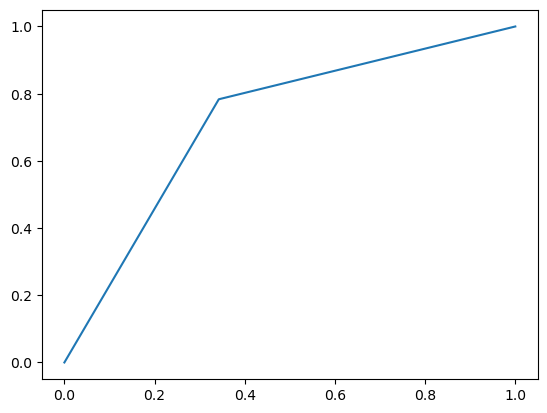

In [27]:
# =======================Divide the data into input and target ===========================

x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

# ========================= Train Test Split ====================================

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# ======================== Outlier analysis based on z-score ==========================

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

z_scores = np.abs(stats.zscore(x_train[selected_columns]))

thershold = 3

outlier_indices = np.where(z_scores > thershold)[0]

x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# ============================= Train the Model ============================
from sklearn.tree import DecisionTreeClassifier

DT  = DecisionTreeClassifier()

DT.fit(x_train,y_train)

# =============================== Prediction ==============================

y_pred_dt = DT.predict(x_test)

# =============================== Metrics =================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_score_dt = round(accuracy_score(y_test,y_pred_dt) * 100,2)
f1_dt = round(f1_score(y_test, y_pred_dt),2)
precision_dt = round(precision_score(y_test, y_pred_dt),2)
recall_dt = round(recall_score(y_test,y_pred_dt),2)

print('accuracy_score', accuracy_score_dt)
print('f1_score', f1_dt)
print('precision_score', precision_dt)
print('recall_score',recall_dt)

# ============================= Confusion Matrics ====================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmt = confusion_matrix(y_test,y_pred_dt)

cmt_disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()

print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)
print('True Positive', tp)

# ==================================== ROC-AUC Curve =================================

y_pred_dt_prob = DT.predict_proba(x_test)[:,1]

fpr, tpr, thershold = roc_curve(y_test, y_pred_dt_prob) # it required y_prediction_probability not just y_prediction
plt.plot(fpr,tpr)
plt.show()


### Logistic Regression 
**Without hyperparameter tuning**

c:\Users\sahil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 74.66
f1_score 0.81
precision_score 0.79
recall_score 0.83


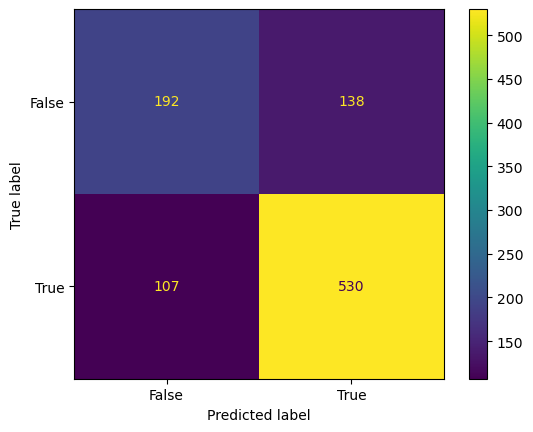

True negative: 192
False postive: 138
False negative: 107
True postive: 530


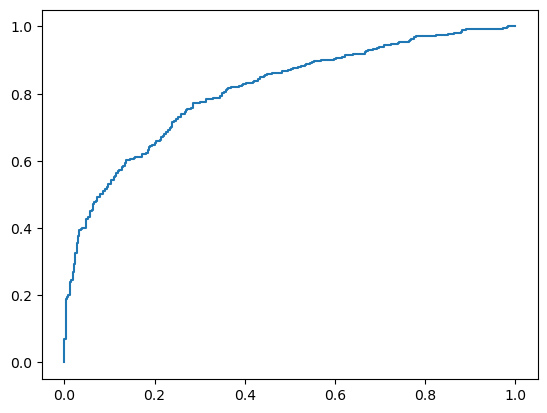

In [30]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=123)

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(x_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression()

LogR.fit(x_train,y_train)

y_pred_logr = LogR.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_LogR = round(accuracy_score(y_test, y_pred_logr)*100,2)
f1_LogR = round(f1_score(y_test,y_pred_logr),2)
precision_LogR = round(precision_score(y_test, y_pred_logr),2)
recall_LogR = round(recall_score(y_test,y_pred_logr),2)

print('accuracy_score', acc_LogR)
print('f1_score', f1_LogR)
print('precision_score', precision_LogR)
print('recall_score',recall_LogR)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cmt_LogR = confusion_matrix(y_test, y_pred_logr)

cmt_LogR_disp = ConfusionMatrixDisplay(confusion_matrix=cmt_LogR, display_labels=[False, True])

cmt_LogR_disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logr).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

y_pred_LogR_prob = LogR.predict_proba(x_test)[:,1]
fpr, tpr, thershold = roc_curve(y_test, y_pred_LogR_prob)
plt.plot(fpr,tpr)
plt.show()



### Naive Bayes
**Without hyperparameter tuning**

accuray is: 75.59
F1 is: 0.8
Precision is: 0.85
Recall is: 0.76


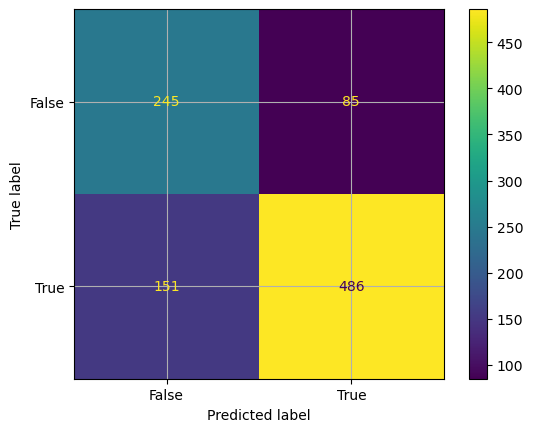

True negative: 245
False postive: 85
False negative: 151
True postive: 486


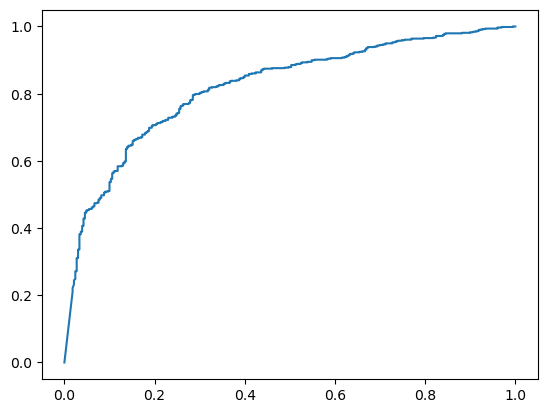

In [33]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(x_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])


from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)

y_pred_NB = NB.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_NB = round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB = round(f1_score(y_test, y_pred_NB),2)
precision_NB = round(precision_score(y_test,y_pred_NB),2)
recall_NB =round(recall_score(y_test, y_pred_NB),2)

print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmt_NB = confusion_matrix(y_test, y_pred_NB)

cmt_NB_disp = ConfusionMatrixDisplay(confusion_matrix=cmt_NB, display_labels=[False,True])

cmt_NB_disp.plot()
plt.grid()
plt.show()

tn,fp,fn,tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

y_pred_NB_prob = NB.predict_proba(x_test)[:,1]

fpr, tpr, thershold = roc_curve(y_test, y_pred_NB_prob)
plt.plot(fpr,tpr)
plt.show()

